In [ ]:
# bloco de imports
import keras
from keras.datasets import mnist
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

#Dense = Neuronio, base da rede
#Dropout = Regularizador, evita overfitting
#RMSprop = BackPropagation - como a rede aprende


In [ ]:
#Carregando os dados de treino e teste

dataset = mnist.load_data()

(x_treino, y_treino), (x_teste, y_teste) = dataset

In [ ]:
print(x_treino[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

essa imagem representa: 9


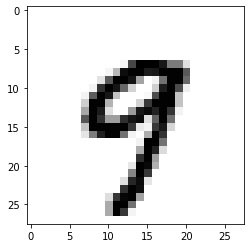

In [ ]:
import matplotlib.pyplot as plt

indice = 45 
print("essa imagem representa:", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [ ]:
#Achatando a matriz de pixel e transformando em uma unica lista

quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_da_imagem = x_treino[0].shape #(28, 28)
resolucao_total = resolucao_da_imagem[0] * resolucao_da_imagem[1] #28 * 28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [ ]:
#Normalização dos dados - transforma o range de 0 até 255 , em 0 até 1 


x_treino = x_treino.astype("float32")
x_teste = x_teste.astype("float32")

x_treino /= 255
x_teste /= 255



In [ ]:
valores_unicos = set(y_treino)
quantidade_valores_unicos = len(valores_unicos)

# Transformar valores unicos em variaveis categoricas.
# ex: numero 1 = [1,0,0,0,0,0]
# ex: numero 2 = [0,1,0,0,0,0]

print(y_treino[0])

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

print(y_treino[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Criando o modelo da rede neural.

model = Sequential()

#Primeira hidden layer
#30 neuronios 
#Funcao de ativação = ReLu

model.add(Dense(30, activation="relu", input_shape=(resolucao_total,)))

#Add um regularizador para evitar overfitting
model.add(Dropout(0.2))

#Segunda hidden layer
model.add(Dense(20, activation="relu"))

#Add um regularizador para evitar overfitting
model.add(Dropout(0.2))


#Layer de saida 
model.add(Dense(quantidade_valores_unicos, activation="softmax"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=["accuracy"])

In [ ]:
#Treina o modelo 

history = model.fit(x_treino, y_treino,
                    batch_size = 128,
                    epochs =10,
                    verbose=1,
                    validation_data=(x_teste, y_teste))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.8798 - accuracy: 0.7151 - val_loss: 0.3091 - val_accuracy: 0.9128
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4686 - accuracy: 0.8581 - val_loss: 0.2481 - val_accuracy: 0.9280
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4057 - accuracy: 0.8784 - val_loss: 0.2183 - val_accuracy: 0.9378
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3637 - accuracy: 0.8910 - val_loss: 0.1987 - val_accuracy: 0.9404
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3416 - accuracy: 0.8985 - val_loss: 0.1940 - val_accuracy: 0.9418
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3265 - accuracy: 0.9054 - val_loss: 0.1819 - val_accuracy: 0.9466
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3101 - accuracy: 0.9098 - val_loss: 0.1801 - val_accuracy: 0.9467
Epoch 

5
Previsao:  [1]
Valor verdadeiro:  1


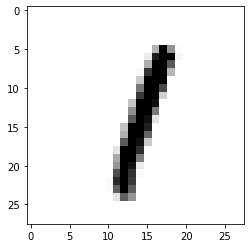

-1
Previsao:  [6]
Valor verdadeiro:  6


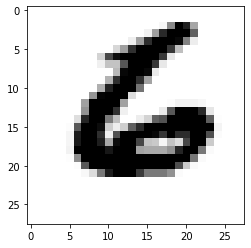

In [43]:
#Fazendo previsões
indice = 0
while indice != -1:
  indice = int(input("Indice: "))

  imagem = x_teste[indice].reshape(1,resolucao_total)
  previsao = model.predict(imagem)

  import numpy as np
  previsao_categorica = np.argmax(previsao, axis=-1)

  (x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
  
  print("Previsao: ", previsao_categorica)
  print("Valor verdadeiro: ", y_teste_img[indice])
  
  plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)
  plt.show()